In [1]:
import scanpy as sc
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

In [2]:
basedir = '/storage/groups/ml01/datasets/projects/20210309_Saliba_covidFibrosis_ignacio.ibarra_malte.luecken'
f = 'bharat_et_al_covid_mono_mac.h5ad'

In [3]:
ad = sc.read_h5ad(join(basedir, 'bharat_et_al_covid_mono_mac.h5ad'))

In [5]:
adfull = sc.read_h5ad(join(basedir, 'bharat_et_al_full.h5ad'))

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
ad.shape, adfull.shape

((28169, 26316), (155413, 26316))

In [24]:
adfull.obs[adfull.obs['Cell Type'].str.startswith('Mo') | adfull.obs['Cell Type'].str.startswith('TR')]['Cell Type'].value_counts()

MoAM-1                   17395
TRAM-1                   15548
MoAM-2                   10032
MoAM-3                    6299
TRAM-2                    6003
TRAM-3                    4024
MoAM-4                     271
Macrophages                  0
Mast cells                   0
Mesothelial-1                0
Mesothelial-2                0
AT1                          0
Fibroblasts-4                0
Plasma cells                 0
Smooth muscle-1              0
Smooth muscle-2              0
T cells                      0
Lymphatic                    0
Fibroblasts-3                0
AT2-1                        0
Fibroblasts-2, SCARA5        0
AT2-2                        0
Artery                       0
B cells                      0
Basal 1                      0
Basal 2                      0
Basal 3                      0
Bronchial vessel             0
Capillary                    0
Ciliated                     0
Club                         0
DCs                          0
Endothel

In [21]:
ad.obs['Cell Type'].value_counts()

MoAM-1    10013
MoAM-2     9591
MoAM-3     6036
TRAM-2     1031
TRAM-1      971
MoAM-4      267
TRAM-3      260
Name: Cell Type, dtype: int64

In [4]:
ad.shape

(28169, 26316)

In [125]:
# Quality control - calculate QC covariates
ad.var['symbol'] = ad.var.index
ad.obs['n_counts'] = ad.X.sum(1)
ad.obs['log_counts'] = np.log(ad.obs['n_counts'])
ad.obs['n_genes'] = (ad.X > 0).sum(1)
mt_gene_mask = [gene.startswith('MT-') for gene in ad.var['symbol']]
ad.obs['mt_frac'] = ad.X[:, mt_gene_mask].toarray().sum(1) / ad.obs['n_counts']

Text(0.5, 0, 'mitocondrial fraction')

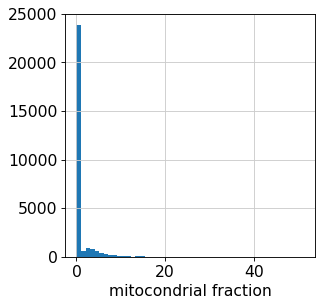

In [126]:
plt.hist(ad.obs['mt_frac'], bins=50);
plt.xlabel('mitocondrial fraction')

In [127]:
ad.obs['mt_frac'].sort_values()

63860      0.000000
121199     0.000000
121197     0.000000
121195     0.000000
121194     0.000000
            ...    
89817     30.372980
140488    31.500599
142215    36.942417
124730    48.709259
75462     51.173153
Name: mt_frac, Length: 28169, dtype: float32

In [128]:
ad.obs['mt_frac'].describe()

count    28169.000000
mean         0.760204
std          2.254362
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         51.173153
Name: mt_frac, dtype: float64

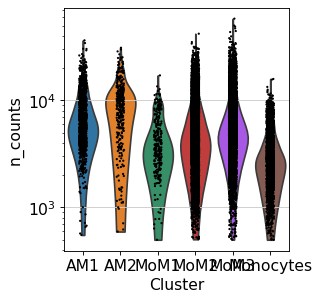

In [129]:
t1 = sc.pl.violin(ad, 'n_counts', groupby='Cluster', size=2, log=True, cut=0)

In [130]:
ad.obs['Cluster'].value_counts()

MoM2         12898
MoM3         10932
Monocytes     2457
AM1           1252
AM2            352
MoM1           278
Name: Cluster, dtype: int64

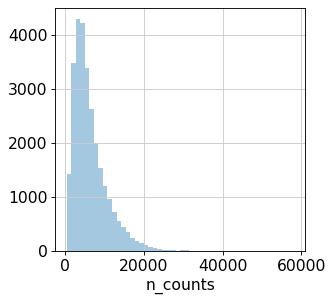

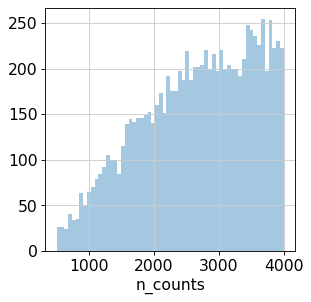

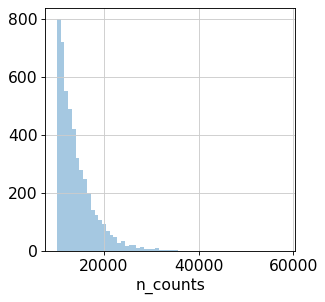

In [131]:
#Thresholding decision: counts
p3 = sns.distplot(ad.obs['n_counts'], kde=False)
plt.show()
p4 = sns.distplot(ad.obs['n_counts'][ad.obs['n_counts']<4000], kde=False, bins=60)
plt.show()
p5 = sns.distplot(ad.obs['n_counts'][ad.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [132]:
print('# before filtering', ad.shape[0])
ad = ad[ad.obs['mt_frac'] < 20,:]
print('# after filtering', ad.shape[0])

# before filtering 28169
# after filtering 28146


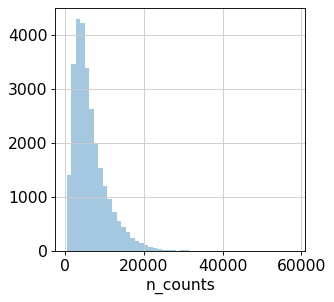

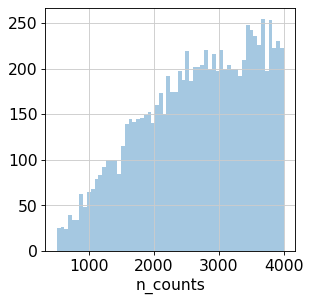

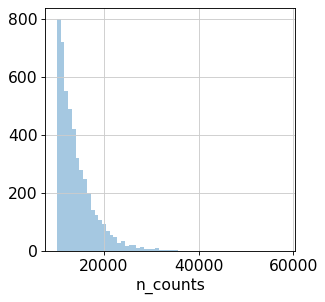

In [133]:
#Thresholding decision: counts
import seaborn as sns
p3 = sns.distplot(ad.obs['n_counts'], kde=False)
plt.show()
p4 = sns.distplot(ad.obs['n_counts'][ad.obs['n_counts']<4000], kde=False, bins=60)
plt.show()
p5 = sns.distplot(ad.obs['n_counts'][ad.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [134]:
ad = ad[ad.X.sum(axis=1) > 1000,:]
ad = ad[ad.obs['mt_frac'] < 0.2,:]
ad = ad[ad.obs['n_genes'] > 700,:]
ad

View of AnnData object with n_obs × n_vars = 22810 × 26316
    obs: 'Unnamed: 0', 'Study', 'Sample Source', 'Sample Name', 'Sample Status', 'Diagnosis', 'COVID-19', 'Tissue Type', 'orig.ident', 'Cell Population', 'Cell Type', 'leiden', 'No of UMIs', 'No of genes', '% of mito genes', 'Cluster', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-12', 'feature_types-12', 'n_cells-12', 'gene_ids-13', 'feature_types-13', 'n_cells-13', 'gene_ids-14', 'feature_types-14', 'n_cells-14', 'gene_ids-15', 'feature_types-15', 'n_cells-15', 'gene_ids-16', 'feature_types-16', 'n_cells-16', 'gene_ids-17', 'feature_types-17', 'n_cells-17', 'gene_ids-18', 'feature_types-18', 'n_cells-18', 'gene_ids-19', 'feature_types-19', 'n_cells-19', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-20', 'featu

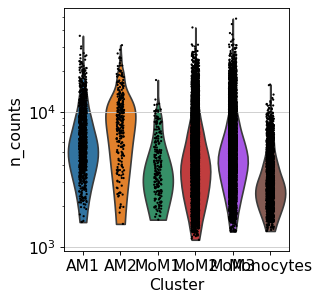

In [135]:
# after filtering observe the counts distributions
t1 = sc.pl.violin(ad, 'n_counts', groupby='Cluster', size=2, log=True, cut=0)

In [139]:
# before normalizing save a copy of the study
ad.raw = ad.copy()

In [141]:
sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e6)
sc.pp.log1p(ad)
sc.pp.pca(ad, n_comps=15)
sc.pp.neighbors(ad)
sc.tl.louvain(ad, key_added='groups', resolution=0.5)

In [142]:
ad.write('../data/budinger/budinger_input_scvi_scanpy_norm.h5ad', compression='lzf')

In [3]:
import scanpy as sc

In [5]:
ad = sc.read_h5ad('../data/budinger/budinger_input_scvi_scanpy_norm.h5ad')

In [7]:
ad.obs['Sample Name'].value_counts()

Case 1    12258
PMB 1      5309
PMB 2      5243
Name: Sample Name, dtype: int64

In [143]:
sc.tl.umap(ad)

In [144]:
ad.obs

,Unnamed: 0,Study,Sample Source,Sample Name,Sample Status,Diagnosis,COVID-19,Tissue Type,orig.ident,Cell Population,...,leiden,No of UMIs,No of genes,% of mito genes,Cluster,n_counts,log_counts,n_genes,mt_frac,groups
63860,ACTTTGTTCATCCTGC-10,Bharat_et_al_2020,NU,Case 1,Disease,COVID-19,True,Parenchyma,Sample_15,Immune-TX,...,5,7891,2311,3.180839,MoM2,7891.0,8.973478,2311,0.000000,1
64651,CAGTTAGAGATGATTG-10,Bharat_et_al_2020,NU,Case 1,Disease,COVID-19,True,Parenchyma,Sample_15,Immune-TX,...,2,4380,1466,6.506849,MoM2,4380.0,8.384804,1466,0.000000,0
67595,AAACCCAAGCAAGTGC-11,Bharat_et_al_2020,NU,Case 1,Disease,COVID-19,True,Parenchyma,Sample_16,Immune-TX,...,2,4116,1353,14.067056,MoM2,4116.0,8.322638,1353,0.000000,0
67597,AAACCCAAGGGTGAGG-11,Bharat_et_al_2020,NU,Case 1,Disease,COVID-19,True,Parenchyma,Sample_16,Immune-TX,...,2,3805,1488,15.952694,MoM2,3805.0,8.244071,1488,0.000000,0
67598,AAACCCAAGTAGAATC-11,Bharat_et_al_2020,NU,Case 1,Disease,COVID-19,True,Parenchyma,Sample_16,Immune-TX,...,2,5983,1893,19.321411,MoM3,5983.0,8.696677,1893,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152653,CGTTCTGCATCGATCA-21,Bharat_et_al_2020,NU,PMB 2,Disease,COVID-19,True,Parenchyma,Sample_22,Immune-TX,...,2,11819,2883,4.095101,MoM3,11819.0,9.377463,2883,0.000000,3
152916,CTGTGGGGTAGATGTA-21,Bharat_et_al_2020,NU,PMB 2,Disease,COVID-19,True,Parenchyma,Sample_22,Immune-TX,...,4,3450,1292,6.927536,MoM3,3450.0,8.146130,1292,0.000000,4
153517,GGATGTTAGCGCCTCA-21,Bharat_et_al_2020,NU,PMB 2,Disease,COVID-19,True,Parenchyma,Sample_22,Immune-TX,...,4,10060,2717,5.248509,MoM3,10060.0,9.216323,2717,0.001292,3
154761,TGACAGTAGCACGATG-21,Bharat_et_al_2020,NU,PMB 2,Disease,COVID-19,True,Parenchyma,Sample_22,Immune-TX,...,4,10598,2505,10.983204,MoM3,10598.0,9.268420,2505,0.000000,3


In [145]:
sc.set_figure_params(facecolor='white')

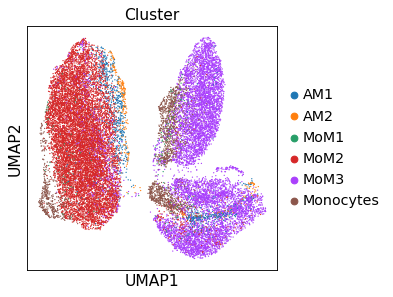

In [146]:
sc.pl.umap(ad, color='Cluster')